## Projeto de Deep Learning
### Usando redes neurais para análise de sentimentos

##### 1.0 Importando Bibliotecas

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from wordcloud import STOPWORDS
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras import layers


#### 2.0 Carregando e Visualizando os dados

In [2]:
dados = pd.read_csv('Tweets.csv')

In [3]:
dados.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#### 3.0 Análise Exploratória e Descritiva

C:\Users\Sávio\AppData\Local\Temp\ipykernel_11568\195852815.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette='viridis')


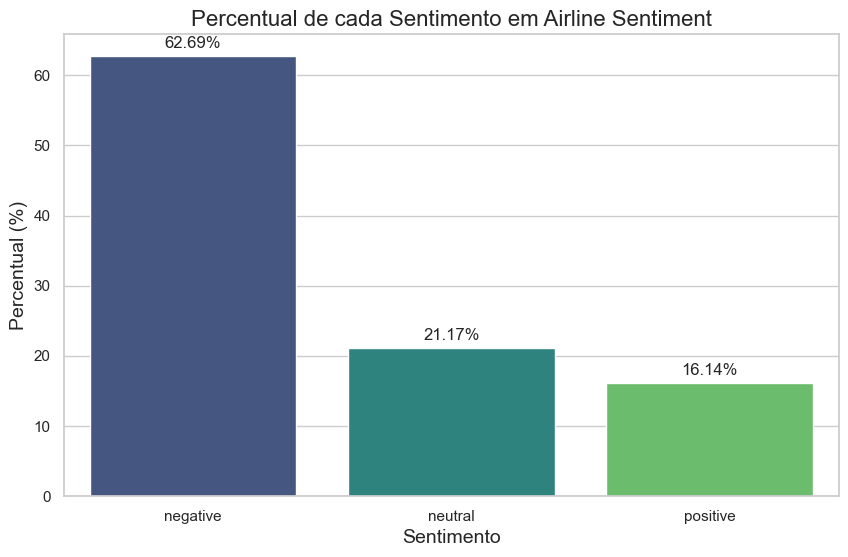

In [4]:
# Contar os valores de cada categoria
sentiment_counts = dados['airline_sentiment'].value_counts()

# Calcular os percentuais
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette='viridis')

# Adicionar rótulos de percentual em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Adicionar títulos e rótulos
plt.title('Percentual de cada Sentimento em Airline Sentiment', fontsize=16)
plt.xlabel('Sentimento', fontsize=14)
plt.ylabel('Percentual (%)', fontsize=14)

# Mostrar o gráfico
plt.show()

C:\Users\Sávio\AppData\Local\Temp\ipykernel_11568\2599017619.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette='viridis')


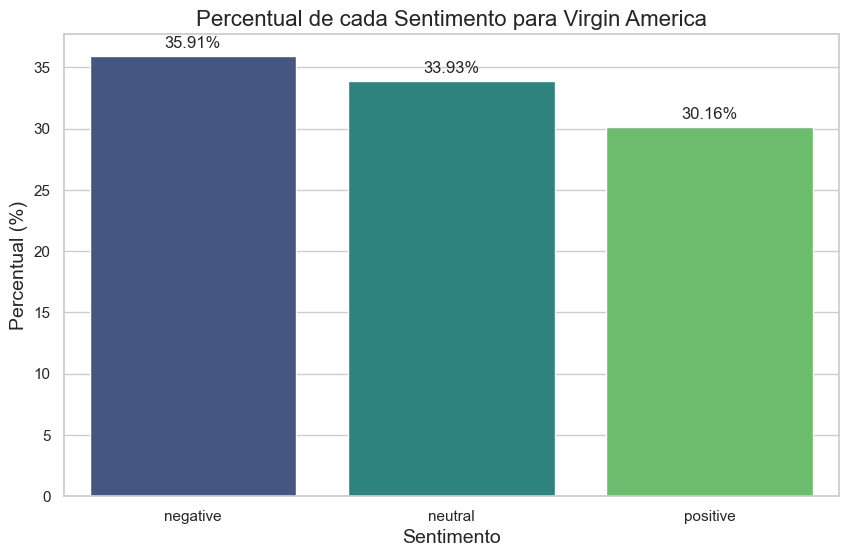

C:\Users\Sávio\AppData\Local\Temp\ipykernel_11568\2599017619.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette='viridis')


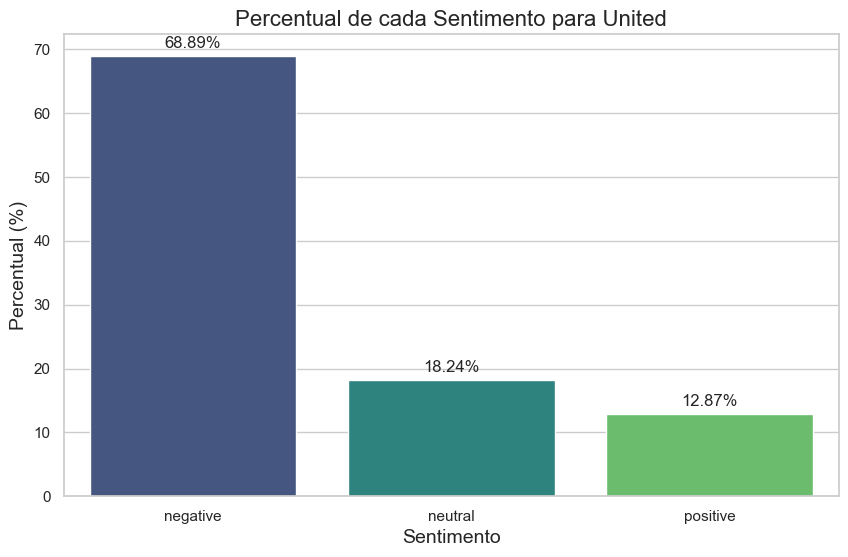

C:\Users\Sávio\AppData\Local\Temp\ipykernel_11568\2599017619.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette='viridis')


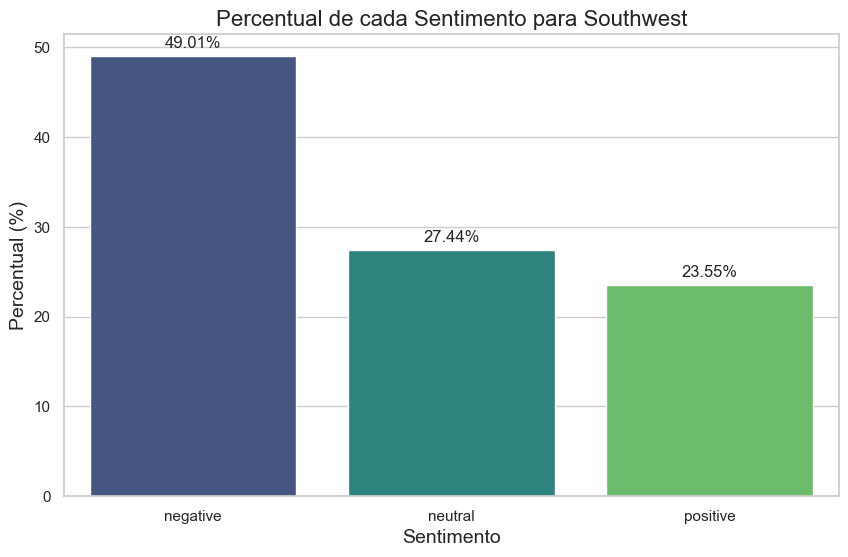

C:\Users\Sávio\AppData\Local\Temp\ipykernel_11568\2599017619.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette='viridis')


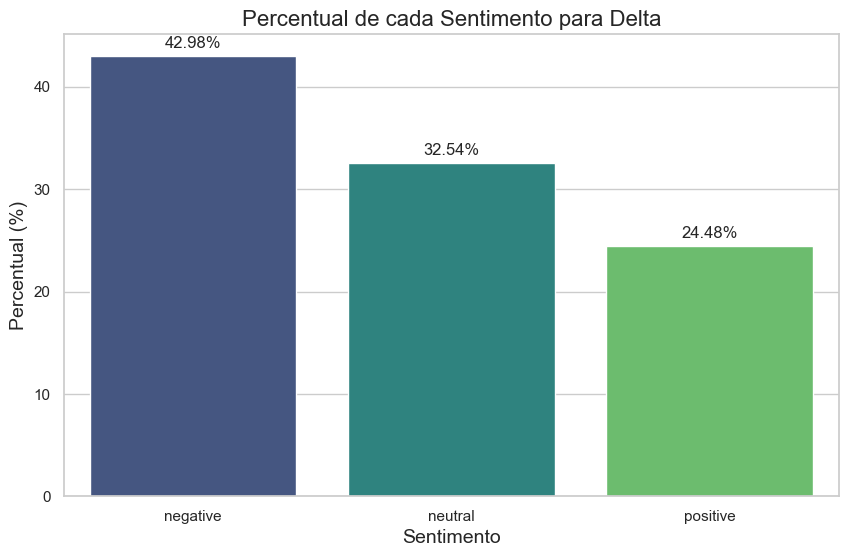

C:\Users\Sávio\AppData\Local\Temp\ipykernel_11568\2599017619.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette='viridis')


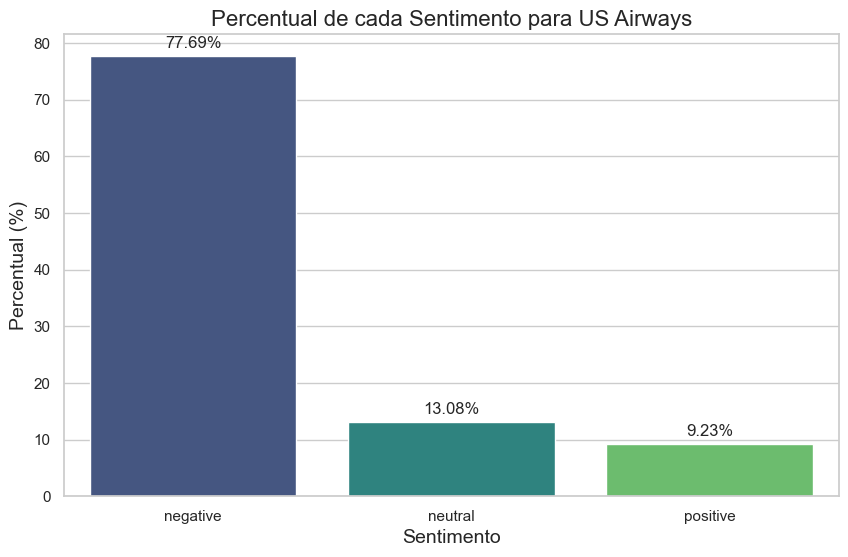

C:\Users\Sávio\AppData\Local\Temp\ipykernel_11568\2599017619.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette='viridis')


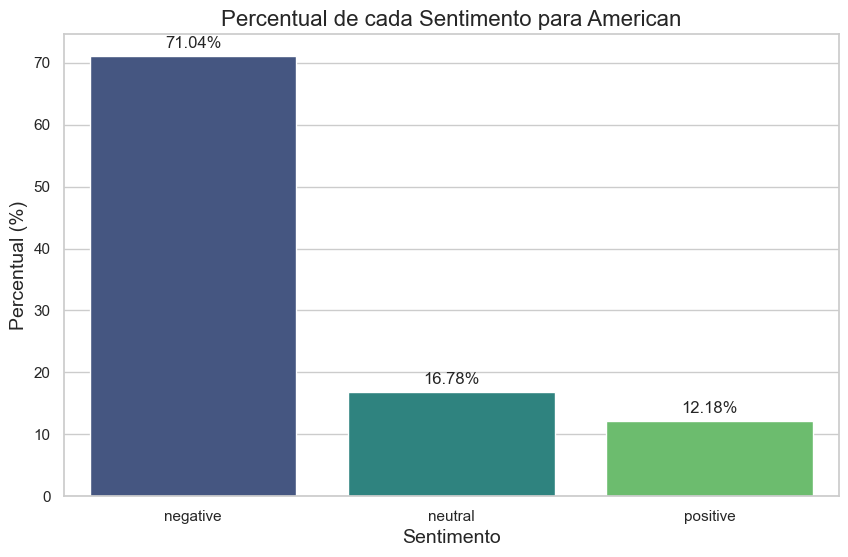

In [5]:
# Obter a lista de companhias aéreas únicas
airlines = dados['airline'].unique()

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar gráficos de barras para cada companhia aérea
for airline in airlines:
    # Filtrar dados para a companhia aérea atual
    airline_data = dados[dados['airline'] == airline]
    
    # Contar os valores de cada categoria de sentimento
    sentiment_counts = airline_data['airline_sentiment'].value_counts()
    
    # Calcular os percentuais
    sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100
    
    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette='viridis')
    
    # Adicionar rótulos de percentual em cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')
    
    # Adicionar títulos e rótulos
    plt.title(f'Percentual de cada Sentimento para {airline}', fontsize=16)
    plt.xlabel('Sentimento', fontsize=14)
    plt.ylabel('Percentual (%)', fontsize=14)
    
    # Mostrar o gráfico
    plt.show()

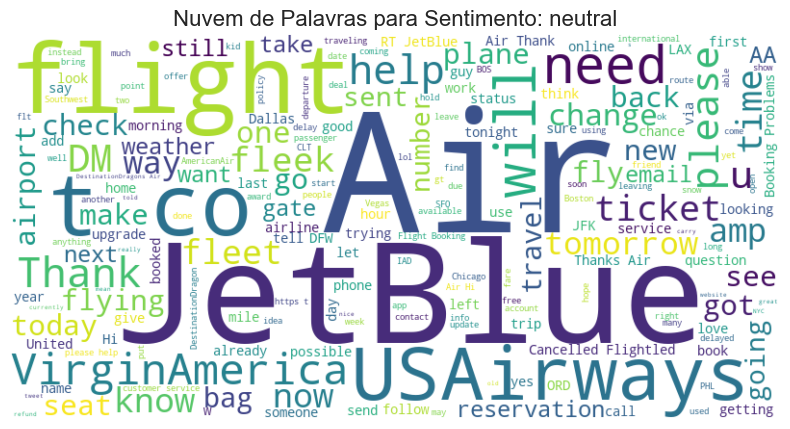

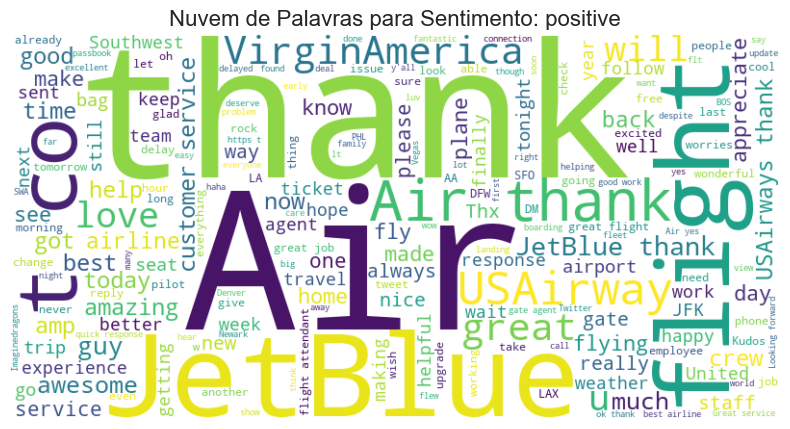

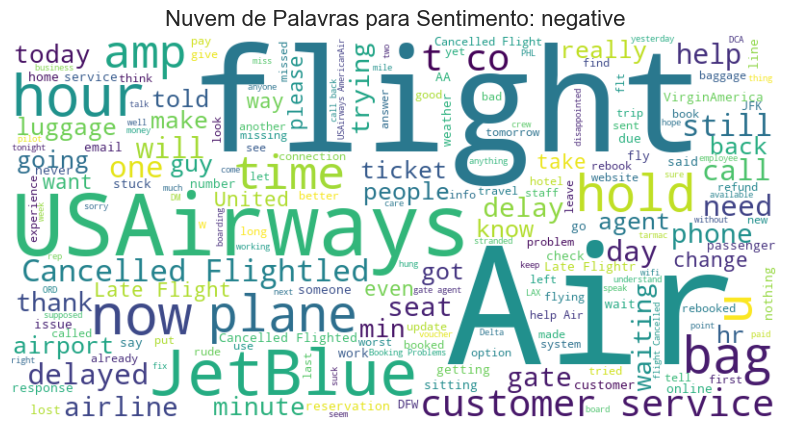

In [6]:
# Função para remover o nome da companhia aérea do texto no formato @CompanhiaAerea
def remove_airline_names(text, airline):
    pattern = re.compile(r'@' + re.escape(airline), re.IGNORECASE)
    return pattern.sub('', text)

# Aplicar a função para remover o nome da companhia aérea da coluna 'text'
dados['clean_text'] = dados.apply(lambda row: remove_airline_names(row['text'], row['airline']), axis=1)

# Obter a lista de sentimentos únicos
sentiments = dados['airline_sentiment'].unique()

# Gerar nuvens de palavras para cada tipo de sentimento
for sentiment in sentiments:
    # Filtrar os dados para o sentimento atual
    sentiment_data = dados[dados['airline_sentiment'] == sentiment]
    
    # Combinar todos os textos da coluna 'clean_text' em uma única string
    text = " ".join(review for review in sentiment_data['clean_text'])
    
    # Gerar a nuvem de palavras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Exibir a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove os eixos
    plt.title(f'Nuvem de Palavras para Sentimento: {sentiment}', fontsize=16)
    plt.show()

#### 4.0 Modelagem dos Dados

In [7]:
# Baixar as stopwords do nltk 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Função para limpar o texto
def clean_text(text):
    # Remover URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remover menções (nomes de usuários @)
    text = re.sub(r'@\w+', '', text)
    # Remover caracteres especiais e números
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    # Remover espaços extras
    text = re.sub(r'\s+', ' ', text).strip()
    # Converter para minúsculas
    text = text.lower()
    return text

# Aplicar a função de limpeza em cada linha da coluna 'text'
dados['clean_text'] = dados['text'].apply(clean_text)

# Remover stopwords
def remove_stopwords(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

dados['clean_text'] = dados['clean_text'].apply(remove_stopwords)

# Exibir as primeiras linhas para verificar a limpeza
dados[['text', 'clean_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sávio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


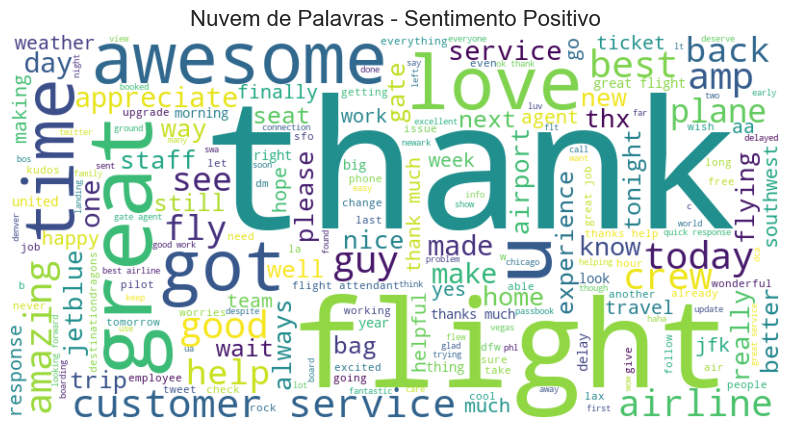

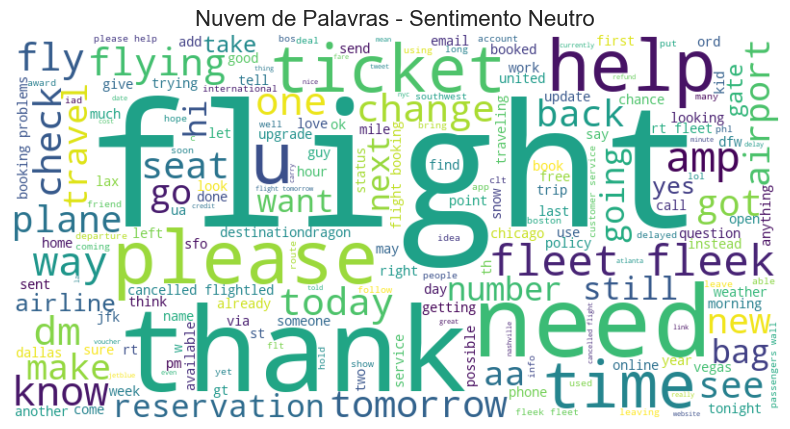

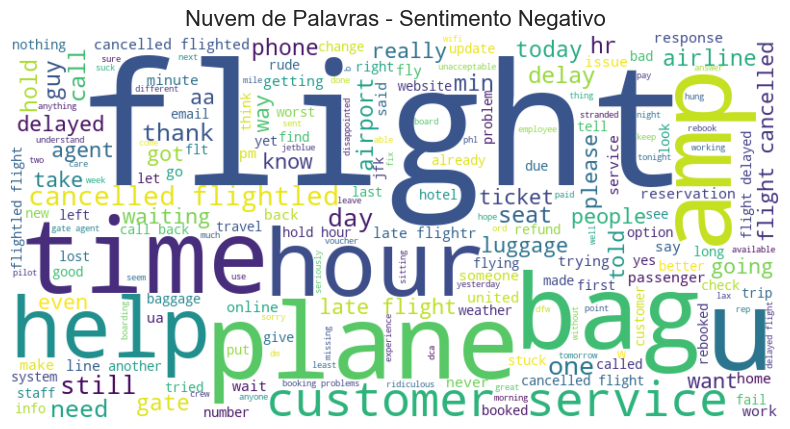

In [8]:
# Filtrar o DataFrame para cada tipo de sentimento
positive_texts = dados[dados['airline_sentiment'] == 'positive']['clean_text']
neutral_texts = dados[dados['airline_sentiment'] == 'neutral']['clean_text']
negative_texts = dados[dados['airline_sentiment'] == 'negative']['clean_text']

# Função para gerar a nuvem de palavras
def generate_wordcloud(texts, title):
    text = " ".join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Gerar nuvem de palavras para cada tipo de sentimento
generate_wordcloud(positive_texts, 'Nuvem de Palavras - Sentimento Positivo')
generate_wordcloud(neutral_texts, 'Nuvem de Palavras - Sentimento Neutro')
generate_wordcloud(negative_texts, 'Nuvem de Palavras - Sentimento Negativo')


#### 5.0 Criação da Rede Neural, Treinamento e Teste do Modelo

In [10]:

# Converter os sentimentos em valores numéricos
dados['target'] = dados['airline_sentiment'].map({'neutral': 0, 'positive': 0, 'negative': 1})

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dados['clean_text'], dados['target'], test_size=0.2, random_state=42)

# Tokenização dos textos
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# Padding das sequências
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Construir o modelo de rede neural
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=100),
    LSTM(64, dropout=0.1, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_data=(X_test_pad, y_test))

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')


Epoch 1/5


C:\Users\Sávio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.6606 - loss: 0.6319 - val_accuracy: 0.7886 - val_loss: 0.4595
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.8193 - loss: 0.4082 - val_accuracy: 0.8255 - val_loss: 0.3962
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.8797 - loss: 0.2999 - val_accuracy: 0.8303 - val_loss: 0.3890
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9029 - loss: 0.2404 - val_accuracy: 0.8166 - val_loss: 0.4325
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9274 - loss: 0.1937 - val_accuracy: 0.8190 - val_loss: 0.4649
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8267 - loss: 0.4581
Acurácia do modelo: 0.82


In [19]:
# Construir o modelo de rede neural
model = tf.keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=32, input_length=100),
    layers.LSTM(64, dropout=0.1, recurrent_dropout=0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_data=(X_test_pad, y_test))

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')

Epoch 1/5


C:\Users\Sávio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.6608 - loss: 0.6310 - val_accuracy: 0.8125 - val_loss: 0.4276
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8493 - loss: 0.3521 - val_accuracy: 0.8227 - val_loss: 0.3912
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8965 - loss: 0.2582 - val_accuracy: 0.8207 - val_loss: 0.4193
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9284 - loss: 0.1943 - val_accuracy: 0.8238 - val_loss: 0.4519
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9410 - loss: 0.1674 - val_accuracy: 0.8149 - val_loss: 0.5180
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8160 - loss: 0.5207
Acurácia do modelo: 0.81


In [20]:
# Fazer previsões com o modelo treinado
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

# Recuperar os índices dos dados de teste para obter os textos correspondentes
X_test_indices = X_test.index

# Criar um DataFrame com os textos, resultados reais e previstos
results = pd.DataFrame({
    'Texto': dados.loc[X_test_indices, 'clean_text'],
    'Real': y_test,
    'Previsto': y_pred.flatten()
})

# Mostrar os 10 primeiros resultados
(results.head(10))


92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


,Texto,Real,Previsto
4794,early frontrunner best airline oscars,0,0
10480,flt ewr cancelled flightled yet flts nyc usair...,1,1
8067,going bdl dca flights yesterday today every si...,1,1
8880,depart washington c,0,0
8292,probably find ticket,1,0
927,still waiting hear back wallet stolen one plan...,1,0
3165,yes flight rebooked losing trust want get anyw...,1,1
7894,thank paris could arrange something,0,0
2818,sure however ticket included one checked bag t...,1,1
9145,great crew flight phx yvr tonight friendly eff...,0,0


C:\Users\Sávio\AppData\Local\Temp\ipykernel_11568\2642527003.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=prediction_counts.index, y=prediction_counts.values, palette='viridis')


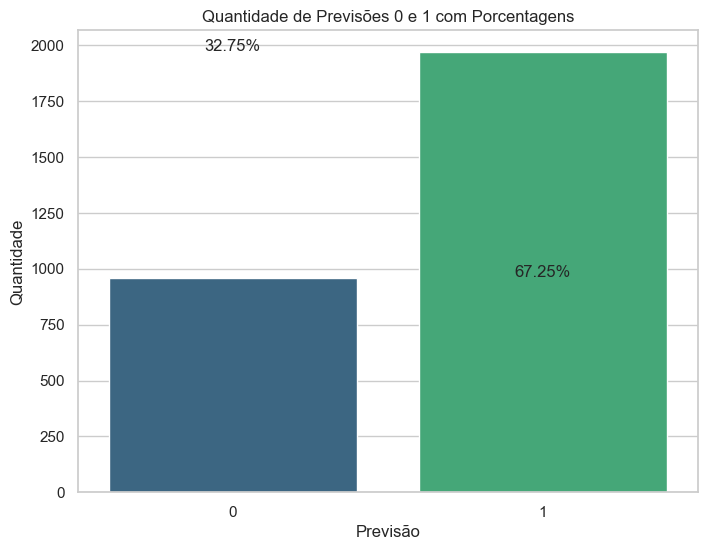

In [22]:

# Contar a quantidade de 0s e 1s na coluna Previsto
prediction_counts = results['Previsto'].value_counts()
total_predictions = len(results)

# Calcular a porcentagem de cada valor
percentages = (prediction_counts / total_predictions) * 100

# Criar um gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=prediction_counts.index, y=prediction_counts.values, palette='viridis')
plt.xlabel('Previsão')
plt.ylabel('Quantidade')
plt.title('Quantidade de Previsões 0 e 1 com Porcentagens')
plt.xticks(ticks=[0, 1], labels=['0', '1'])

# Adicionar rótulos de porcentagem nas barras
for i, count in enumerate(prediction_counts):
    percentage = percentages[i]
    ax.text(i, count + 5, f'{percentage:.2f}%', ha='center', fontsize=12)

plt.show()

#### 6.0 Conclusões e Análises das Previsões

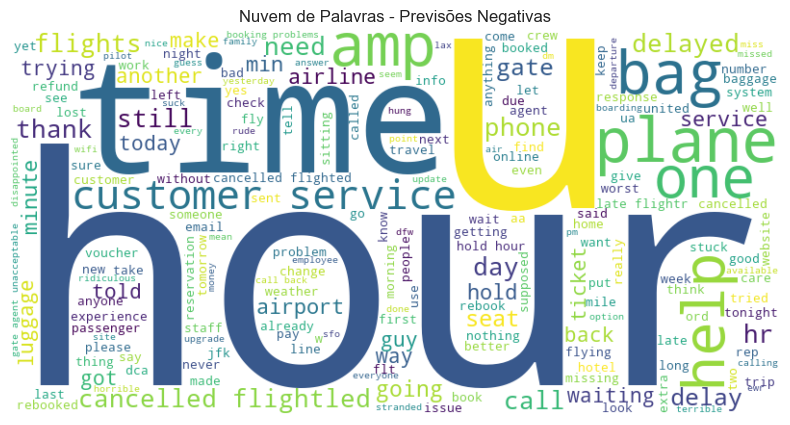

In [26]:
from wordcloud import STOPWORDS

# Filtrar os textos cujas previsões são iguais a 1
predicted_negative_texts = results[results['Previsto'] == 1]['Texto']

# Combinar todos esses textos em uma única string
combined_text = " ".join(predicted_negative_texts)

# Adicionar a palavra "flight" às stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.add("flight")

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(combined_text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Previsões Negativas')
plt.show()
